In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Модели и инструменты scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix, 
                             classification_report, roc_curve, auc)

# Классификаторы
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import permutation_importance
from sklearn.dummy import DummyClassifier
from datetime import datetime

import json
import joblib
import os

# Настройка отображения графиков
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Фиксируем random_state для воспроизводимости
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [3]:
df = pd.read_csv('./data/S06-hw-dataset-01.csv')
df.head()

,id,num01,num02,num03,num04,num05,num06,num07,num08,num09,...,num20,num21,num22,num23,num24,cat_contract,cat_region,cat_payment,tenure_months,target
0,1,-0.946058,-0.070313,1.824445,-2.754422,0.808865,-0.111094,-0.268950,-3.078210,0.801275,...,-1.616515,-1.989464,1.407390,-0.218362,2.016052,0,2,3,33,0
1,2,-2.484027,0.739378,1.596908,-2.586479,-0.033225,-3.054412,-4.706908,-9.795169,0.145911,...,-1.727040,-0.583997,1.136761,0.285978,-0.310879,2,2,2,102,1
2,3,1.522629,7.159635,-0.564903,-4.493110,1.623610,5.450187,-0.974595,-5.189589,1.600591,...,0.524408,2.022430,1.278358,-0.850547,0.847457,1,0,2,3,0
3,4,0.463373,-1.073908,1.752813,0.362786,2.790872,4.082385,0.322283,3.390984,-0.033929,...,2.399834,-1.431576,-0.746987,0.049639,2.414689,1,0,1,50,0
4,5,3.188390,-4.701692,-0.689918,-0.448995,0.373821,-3.275363,-1.760931,0.923689,0.537345,...,-2.183407,-2.896590,2.440343,-1.097168,1.457323,1,2,3,81,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             12000 non-null  int64  
 1   num01          12000 non-null  float64
 2   num02          12000 non-null  float64
 3   num03          12000 non-null  float64
 4   num04          12000 non-null  float64
 5   num05          12000 non-null  float64
 6   num06          12000 non-null  float64
 7   num07          12000 non-null  float64
 8   num08          12000 non-null  float64
 9   num09          12000 non-null  float64
 10  num10          12000 non-null  float64
 11  num11          12000 non-null  float64
 12  num12          12000 non-null  float64
 13  num13          12000 non-null  float64
 14  num14          12000 non-null  float64
 15  num15          12000 non-null  float64
 16  num16          12000 non-null  float64
 17  num17          12000 non-null  float64
 18  num18 

In [5]:
df.describe()

,id,num01,num02,num03,num04,num05,num06,num07,num08,num09,...,num20,num21,num22,num23,num24,cat_contract,cat_region,cat_payment,tenure_months,target
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,0.013705,-0.005278,-0.002357,0.038404,-0.006301,-0.865297,-0.702877,-0.290694,-0.008154,...,-0.323083,-1.314833,0.319798,-0.002742,0.027459,0.988750,1.990167,1.506833,36.083833,0.323417
std,3464.24595,2.096534,3.544498,1.004417,2.087318,1.007329,3.888966,1.989513,3.455981,0.996677,...,2.167066,3.731384,2.223649,0.996454,1.882359,0.815687,1.411643,1.121558,25.061218,0.467800
min,1.00000,-8.155181,-14.605579,-4.374043,-7.753301,-3.999332,-15.238402,-7.377252,-13.853627,-3.794637,...,-8.371050,-14.249204,-8.638879,-3.532093,-7.923990,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3000.75000,-1.423844,-2.303772,-0.685618,-1.374579,-0.676552,-3.532054,-2.064888,-2.597019,-0.683959,...,-1.808969,-3.863063,-1.097700,-0.676150,-1.110822,0.000000,1.000000,0.000000,17.000000,0.000000
50%,6000.50000,-0.047565,0.053348,-0.009186,0.038766,-0.003728,-1.092517,-0.795907,-0.208245,-0.020883,...,-0.383940,-1.393400,0.431804,0.006297,0.279689,1.000000,2.000000,2.000000,30.000000,0.000000
75%,9000.25000,1.422676,2.335937,0.671441,1.484417,0.669269,1.526389,0.522625,2.093169,0.666959,...,1.125140,1.116111,1.853491,0.657478,1.363896,2.000000,3.000000,3.000000,49.000000,1.000000
max,12000.00000,8.610863,16.299709,3.651692,7.571965,4.562115,16.223054,8.006444,13.030011,3.976868,...,7.957847,15.937281,8.102095,3.707905,7.549514,2.000000,4.000000,3.000000,120.000000,1.000000


In [6]:
print("Распределение целевой переменной (target):")
target_dist = df['target'].value_counts(normalize=True)
print(target_dist)
print(f"\nКоличество записей: {len(df)}")
print(f"Класс 0: {df['target'].value_counts()[0]} ({target_dist[0]*100:.2f}%)")
print(f"Класс 1: {df['target'].value_counts()[1]} ({target_dist[1]*100:.2f}%)")

Распределение целевой переменной (target):
target
0    0.676583
1    0.323417
Name: proportion, dtype: float64

Количество записей: 12000
Класс 0: 8119 (67.66%)
Класс 1: 3881 (32.34%)


In [7]:
print("Пропуски в данных:")
print(df.isnull().sum().sort_values(ascending=False))
print(f"\nВсего пропусков: {df.isnull().sum().sum()}")

Пропуски в данных:
id               0
num01            0
num02            0
num03            0
num04            0
num05            0
num06            0
num07            0
num08            0
num09            0
num10            0
num11            0
num12            0
num13            0
num14            0
num15            0
num16            0
num17            0
num18            0
num19            0
num20            0
num21            0
num22            0
num23            0
num24            0
cat_contract     0
cat_region       0
cat_payment      0
tenure_months    0
target           0
dtype: int64

Всего пропусков: 0


In [8]:
df.dtypes

id                 int64
num01            float64
num02            float64
num03            float64
num04            float64
num05            float64
num06            float64
num07            float64
num08            float64
num09            float64
num10            float64
num11            float64
num12            float64
num13            float64
num14            float64
num15            float64
num16            float64
num17            float64
num18            float64
num19            float64
num20            float64
num21            float64
num22            float64
num23            float64
num24            float64
cat_contract       int64
cat_region         int64
cat_payment        int64
tenure_months      int64
target             int64
dtype: object

In [9]:
X = df.drop(columns=['id', 'target'])
y = df['target']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,          # 20% данных в тестовую выборку
    random_state=42,        # Фиксируем random_state для воспроизводимости
    stratify=y              # Сохраняем пропорции классов
)

# Проверяем размерности выборок
print("Размеры выборок:")
print(f"Обучающая выборка (X_train): {X_train.shape}")
print(f"Тестовая выборка (X_test): {X_test.shape}")
print(f"Обучающая выборка (y_train): {y_train.shape}")
print(f"Тестовая выборка (y_test): {y_test.shape}")

# Проверяем распределение классов в выборках
print("\nРаспределение классов в обучающей выборке:")
train_dist = y_train.value_counts(normalize=True)
print(f"Класс 0: {y_train.value_counts()[0]} ({train_dist[0]*100:.2f}%)")
print(f"Класс 1: {y_train.value_counts()[1]} ({train_dist[1]*100:.2f}%)")

print("\nРаспределение классов в тестовой выборке:")
test_dist = y_test.value_counts(normalize=True)
print(f"Класс 0: {y_test.value_counts()[0]} ({test_dist[0]*100:.2f}%)")
print(f"Класс 1: {y_test.value_counts()[1]} ({test_dist[1]*100:.2f}%)")

print("\nИсходное распределение классов:")
original_dist = y.value_counts(normalize=True)
print(f"Класс 0: {y.value_counts()[0]} ({original_dist[0]*100:.2f}%)")
print(f"Класс 1: {y.value_counts()[1]} ({original_dist[1]*100:.2f}%)")

Размеры выборок:
Обучающая выборка (X_train): (9600, 28)
Тестовая выборка (X_test): (2400, 28)
Обучающая выборка (y_train): (9600,)
Тестовая выборка (y_test): (2400,)

Распределение классов в обучающей выборке:
Класс 0: 6495 (67.66%)
Класс 1: 3105 (32.34%)

Распределение классов в тестовой выборке:
Класс 0: 1624 (67.67%)
Класс 1: 776 (32.33%)

Исходное распределение классов:
Класс 0: 8119 (67.66%)
Класс 1: 3881 (32.34%)


## seed и стратификация
Когда мы делим данные случайным образом, компьютер каждый раз будет выбирать разные примеры для обучения и тестирования. Если мы зафиксируем seed (например, числом 42), то разделение всегда будет одинаковым. Это нужно, чтобы можно было повторить эксперимент и получить такие же результаты.
В наших данных есть два класса (например, 0 и 1). Без стратификации может получиться так, что в обучающую выборку попадут в основном одни нули, а в тестовую - в основном единицы. Стратификация следит за тем, чтобы пропорция классов в обеих выборках была такой же, как в исходных данных. Это помогает модели правильно учиться и даёт более честную оценку её работы.

In [11]:
# 1. DummyClassifier с стратегией 'most_frequent'
print("1. DummyClassifier (most_frequent):")
print("="*50)

dummy_clf = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_clf.fit(X_train, y_train)
y_pred_dummy = dummy_clf.predict(X_test)

# Метрики для DummyClassifier
print(f"Accuracy:  {accuracy_score(y_test, y_pred_dummy):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dummy):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_dummy):.4f}")
print(f"F1-score:  {f1_score(y_test, y_pred_dummy):.4f}")

# 2. LogisticRegression через Pipeline
print("\n2. LogisticRegression (со StandardScaler):")
print("="*50)

# Создаем pipeline: стандартизация + логистическая регрессия
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42, max_iter=1000))
])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)
y_pred_proba_lr = lr_pipeline.predict_proba(X_test)[:, 1]  # Вероятности класса 1

# Метрики для LogisticRegression
print(f"Accuracy:  {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-score:  {f1_score(y_test, y_pred_lr):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_pred_proba_lr):.4f}")

# Сравнительная таблица метрик
print("\n3. Сравнительная таблица метрик:")
print("="*50)
metrics_comparison = pd.DataFrame({
    'Метрика': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC'],
    'DummyClassifier': [
        accuracy_score(y_test, y_pred_dummy),
        precision_score(y_test, y_pred_dummy),
        recall_score(y_test, y_pred_dummy),
        f1_score(y_test, y_pred_dummy),
        'N/A'
    ],
    'LogisticRegression': [
        accuracy_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_lr),
        roc_auc_score(y_test, y_pred_proba_lr)
    ]
})

print(metrics_comparison)

1. DummyClassifier (most_frequent):
Accuracy:  0.6767
Precision: 0.0000
Recall:    0.0000
F1-score:  0.0000

2. LogisticRegression (со StandardScaler):
Accuracy:  0.8275
Precision: 0.7828
Recall:    0.6456
F1-score:  0.7076
ROC-AUC:   0.8747

3. Сравнительная таблица метрик:


d:\DPO_MIREA\aie_goldobin_rsbo-01-24\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\DPO_MIREA\aie_goldobin_rsbo-01-24\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


     Метрика DummyClassifier  LogisticRegression
0   Accuracy        0.676667            0.827500
1  Precision             0.0            0.782813
2     Recall             0.0            0.645619
3   F1-score             0.0            0.707627
4    ROC-AUC             N/A            0.874691


In [12]:
# Краткая интерпретация результатов
print("="*40)

print("""
1. DummyClassifier (most_frequent):
   - Всегда предсказывает класс 0 (самый частый).
   - Accuracy = {:.4f} - совпадает с долей класса 0 в данных.
   - Не обнаруживает класс 1 (recall=0) - бесполезна для задачи.

2. LogisticRegression:
   - Accuracy = {:.4f} - лучше случайного угадывания.
   - Обнаруживает {:.1f}% случаев класса 1 (recall={:.4f}).
   - ROC-AUC = {:.4f} - умеренная предсказательная способность.
   - Значительно лучше DummyClassifier по всем метрикам.

Вывод: LogisticRegression уже показывает осмысленные результаты,
но есть простор для улучшения через настройку гиперпараметров
или выбор других алгоритмов.
""".format(
    accuracy_score(y_test, y_pred_dummy),
    accuracy_score(y_test, y_pred_lr),
    recall_score(y_test, y_pred_lr) * 100,
    recall_score(y_test, y_pred_lr),
    roc_auc_score(y_test, y_pred_proba_lr)
))


1. DummyClassifier (most_frequent):
   - Всегда предсказывает класс 0 (самый частый).
   - Accuracy = 0.6767 - совпадает с долей класса 0 в данных.
   - Не обнаруживает класс 1 (recall=0) - бесполезна для задачи.

2. LogisticRegression:
   - Accuracy = 0.8275 - лучше случайного угадывания.
   - Обнаруживает 64.6% случаев класса 1 (recall=0.6456).
   - ROC-AUC = 0.8747 - умеренная предсказательная способность.
   - Значительно лучше DummyClassifier по всем метрикам.

Вывод: LogisticRegression уже показывает осмысленные результаты,
но есть простор для улучшения через настройку гиперпараметров
или выбор других алгоритмов.



In [13]:
# Настройка кросс-валидации
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Функция для быстрой оценки модели
def quick_evaluate(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else np.nan
    }

# Создаем DataFrame для хранения результатов
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'ROC-AUC'])

# DecisionTreeClassifier
print("DecisionTreeClassifier")
# Расширенный сет параметров для контроля сложности
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],  # Увеличен диапазон
    'min_samples_split': [2, 5, 10],  # Добавлен контроль разделения узлов
    'min_samples_leaf': [1, 3, 5, 10],  # Расширен диапазон
    'max_leaf_nodes': [None, 10, 20, 50],  # Контроль максимального количества листьев
    'min_impurity_decrease': [0.0, 0.01, 0.05],  # Контроль минимального уменьшения примеси
    'criterion': ['gini', 'entropy']  # Добавлен entropy для сравнения
}

dt = DecisionTreeClassifier(random_state=42)
grid_dt = GridSearchCV(dt, param_grid_dt, cv=cv, scoring='f1', n_jobs=-1, verbose=1)  # verbose=1 для отслеживания прогресса
grid_dt.fit(X_train, y_train)

print(f"Лучшие параметры: {grid_dt.best_params_}")
print(f"Лучший F1-score на CV: {grid_dt.best_score_:.4f}")

# Оценка на тестовых данных
dt_best = grid_dt.best_estimator_
dt_metrics = quick_evaluate(dt_best, X_test, y_test, "DecisionTree")
results_df = pd.concat([results_df, pd.DataFrame([dt_metrics])], ignore_index=True)

# RandomForestClassifier
print("RandomForestClassifier")
# Минимальный сет параметров для ускорения
param_grid_rf = {
    'n_estimators': [100],  # Один вариант для скорости
    'max_depth': [5, 10, None],  # Контроль глубины
    'min_samples_leaf': [1, 3],  # Контроль через min_samples_leaf
    'max_features': ['sqrt']  # Один вариант для скорости
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=cv, scoring='f1', n_jobs=-1, verbose=0)
grid_rf.fit(X_train, y_train)

print(f"Лучшие параметры: {grid_rf.best_params_}")
print(f"Лучший F1-score на CV: {grid_rf.best_score_:.4f}")

# Оценка на тестовых данных
rf_best = grid_rf.best_estimator_
rf_metrics = quick_evaluate(rf_best, X_test, y_test, "RandomForest")
results_df = pd.concat([results_df, pd.DataFrame([rf_metrics])], ignore_index=True)

# GradientBoostingClassifier
print("GradientBoostingClassifier")
# Минимальный сет параметров для ускорения
param_grid_gb = {
    'n_estimators': [100],  # Один вариант для скорости
    'learning_rate': [0.05, 0.1],  # Упрощено
    'max_depth': [3, 5],  # Контроль глубины
    'min_samples_split': [5]  # Фиксировано для скорости
}

gb = GradientBoostingClassifier(random_state=42)
grid_gb = GridSearchCV(gb, param_grid_gb, cv=cv, scoring='f1', n_jobs=-1, verbose=0)
grid_gb.fit(X_train, y_train)

print(f"Лучшие параметры: {grid_gb.best_params_}")
print(f"Лучший F1-score на CV: {grid_gb.best_score_:.4f}")

# Оценка на тестовых данных
gb_best = grid_gb.best_estimator_
gb_metrics = quick_evaluate(gb_best, X_test, y_test, "GradientBoosting")
results_df = pd.concat([results_df, pd.DataFrame([gb_metrics])], ignore_index=True)

# StackingClassifier
print("StackingClassifier")
# Используем уже обученные модели для стекинга (ускоряем обучение)
stacking_clf = StackingClassifier(
    estimators=[
        ('dt', dt_best),
        ('rf', rf_best)
    ],
    final_estimator=LogisticRegression(random_state=42, max_iter=1000),
    cv=cv,
    n_jobs=-1
)

# Быстрое обучение на уже подобранных моделях
stacking_clf.fit(X_train, y_train)
stacking_metrics = quick_evaluate(stacking_clf, X_test, y_test, "Stacking")
results_df = pd.concat([results_df, pd.DataFrame([stacking_metrics])], ignore_index=True)

DecisionTreeClassifier
Fitting 3 folds for each of 1440 candidates, totalling 4320 fits
Лучшие параметры: {'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 50, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 2}
Лучший F1-score на CV: 0.8052
RandomForestClassifier


C:\Users\Nikita\AppData\Local\Temp\ipykernel_12968\4084525600.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([dt_metrics])], ignore_index=True)


Лучшие параметры: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 100}
Лучший F1-score на CV: 0.8834
GradientBoostingClassifier
Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
Лучший F1-score на CV: 0.8811
StackingClassifier


d:\DPO_MIREA\aie_goldobin_rsbo-01-24\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


                Model  Accuracy  Precision  Recall      F1  ROC-AUC
0            Stacking    0.9317     0.9135  0.8711  0.8918   0.9665
1        RandomForest    0.9258     0.9284  0.8351  0.8792   0.9666
2    GradientBoosting    0.9204     0.9173  0.8286  0.8707   0.9663
3        DecisionTree    0.8650     0.8148  0.7539  0.7831   0.8914
4  LogisticRegression    0.8275     0.7828  0.6456  0.7076   0.8747
5               Dummy    0.6767     0.0000  0.0000  0.0000      NaN


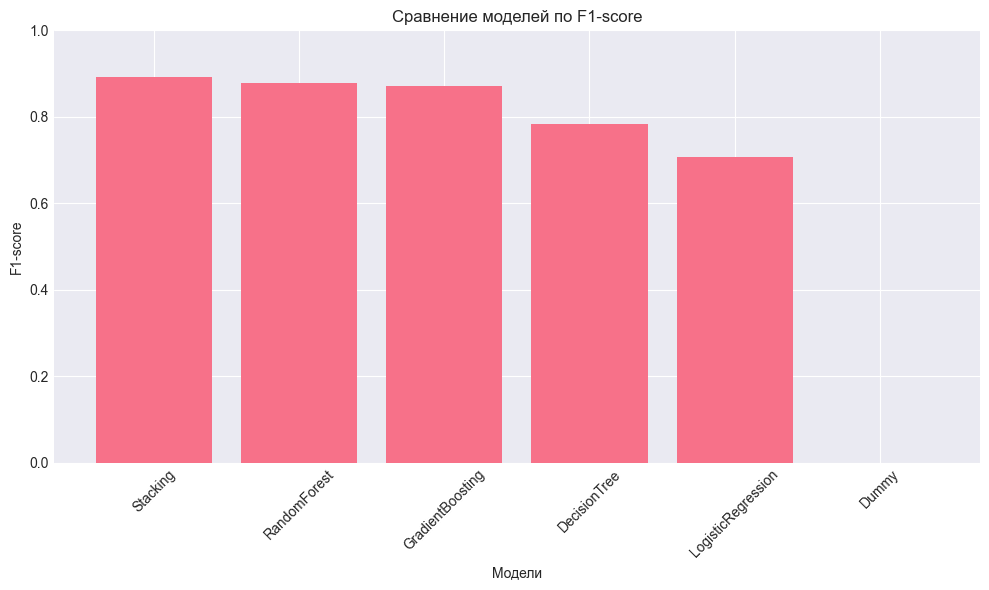

In [14]:
# Сравнение результатов всех моделей
# Добавляем результаты baseline моделей
baseline_metrics = [
    {'Model': 'Dummy', 'Accuracy': accuracy_score(y_test, y_pred_dummy), 
     'Precision': precision_score(y_test, y_pred_dummy), 
     'Recall': recall_score(y_test, y_pred_dummy), 
     'F1': f1_score(y_test, y_pred_dummy), 'ROC-AUC': np.nan},
    {'Model': 'LogisticRegression', 'Accuracy': accuracy_score(y_test, y_pred_lr), 
     'Precision': precision_score(y_test, y_pred_lr), 
     'Recall': recall_score(y_test, y_pred_lr), 
     'F1': f1_score(y_test, y_pred_lr), 
     'ROC-AUC': roc_auc_score(y_test, y_pred_proba_lr)}
]

results_df = pd.concat([results_df, pd.DataFrame(baseline_metrics)], ignore_index=True)

# Сортируем по F1-score
results_df = results_df.sort_values('F1', ascending=False).reset_index(drop=True)
print(results_df.round(4))

# Простая визуализация
plt.figure(figsize=(10, 6))
x = np.arange(len(results_df))
plt.bar(x, results_df['F1'])
plt.xlabel('Модели')
plt.ylabel('F1-score')
plt.title('Сравнение моделей по F1-score')
plt.xticks(x, results_df['Model'], rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [15]:
# Краткая интерпретация результатов
print(f"""
1. DecisionTree: F1={dt_metrics['F1']:.4f}, лучшие параметры: {grid_dt.best_params_}
   Контроль сложности через max_depth и min_samples_leaf.

2. RandomForest: F1={rf_metrics['F1']:.4f}, лучшие параметры: {grid_rf.best_params_}
   Использованы лесные ручки: max_depth, min_samples_leaf, max_features.

3. GradientBoosting: F1={gb_metrics['F1']:.4f}, лучшие параметры: {grid_gb.best_params_}
   Boosting-модель с контролем learning_rate и max_depth.

4. Stacking: F1={stacking_metrics['F1']:.4f}
   Ансамбль DecisionTree + RandomForest с LogisticRegression как метамоделью.

Лучшая модель: {results_df.iloc[0]['Model']} (F1={results_df.iloc[0]['F1']:.4f})
Все модели превосходят baseline (DummyClassifier).
""")


1. DecisionTree: F1=0.7831, лучшие параметры: {'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 50, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 2}
   Контроль сложности через max_depth и min_samples_leaf.

2. RandomForest: F1=0.8792, лучшие параметры: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 100}
   Использованы лесные ручки: max_depth, min_samples_leaf, max_features.

3. GradientBoosting: F1=0.8707, лучшие параметры: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
   Boosting-модель с контролем learning_rate и max_depth.

4. Stacking: F1=0.8918
   Ансамбль DecisionTree + RandomForest с LogisticRegression как метамоделью.

Лучшая модель: Stacking (F1=0.8918)
Все модели превосходят baseline (DummyClassifier).



1. Сохранение метрик в artifacts/metrics_test.csv
Метрики сохранены в artifacts/metrics_test.csv

Финальные метрики на test:
                Model  Accuracy  Precision  Recall      F1  ROC-AUC
0            Stacking    0.9317     0.9135  0.8711  0.8918   0.9665
1        RandomForest    0.9258     0.9284  0.8351  0.8792   0.9666
2    GradientBoosting    0.9204     0.9173  0.8286  0.8707   0.9663
3        DecisionTree    0.8650     0.8148  0.7539  0.7831   0.8914
4  LogisticRegression    0.8275     0.7828  0.6456  0.7076   0.8747
5               Dummy    0.6767     0.0000  0.0000  0.0000      NaN

2. Сохранение результатов подбора гиперпараметров
Результаты подбора сохранены в artifacts/search_summaries.json
DecisionTree: CV-F1 = 0.8052
RandomForest: CV-F1 = 0.8834
GradientBoosting: CV-F1 = 0.8811

3. Создание ROC-кривой


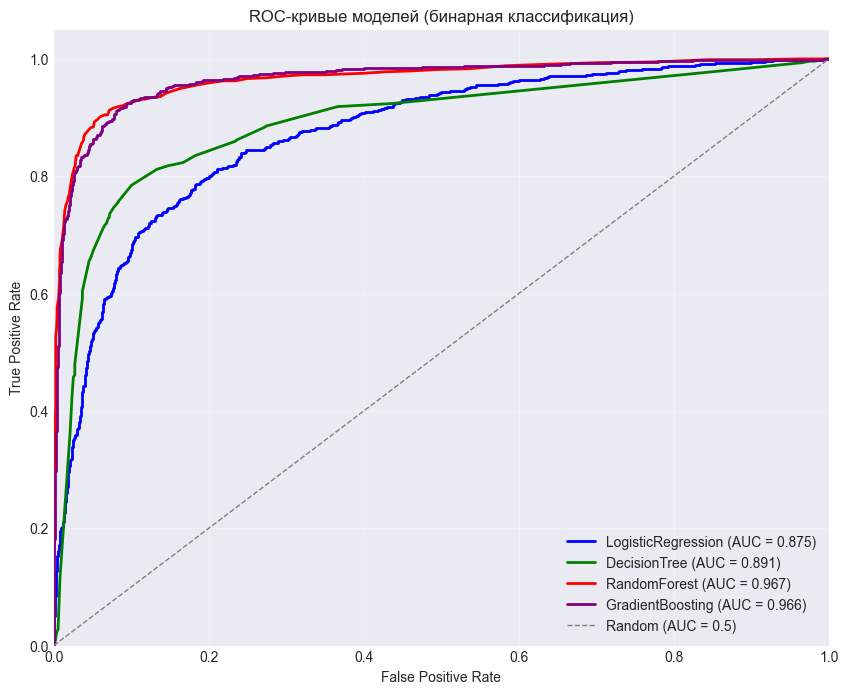

ROC-кривая сохранена в artifacts/figures\roc_curves.png

4. Создание Confusion Matrix для лучшей модели
Лучшая модель по F1-score: Stacking


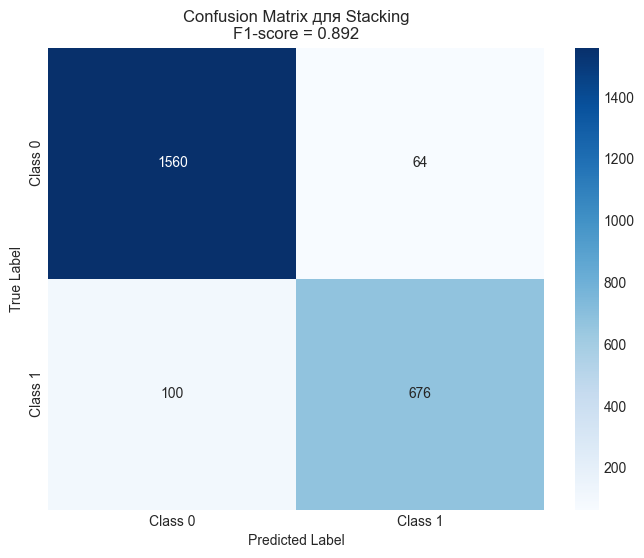

Confusion matrix сохранена в artifacts/figures\confusion_matrix_Stacking.png

Confusion Matrix для Stacking:
TN = 1560, FP = 64
FN = 100, TP = 676
Accuracy = 0.9317
Precision = 0.9135
Recall = 0.8711
F1-score = 0.8918


In [16]:
# Создаем папку figures внутри artifacts
figures_dir = "artifacts/figures"
os.makedirs(figures_dir, exist_ok=True)

# 1. Расчет дополнительных метрик и сохранение в CSV
print("1. Сохранение метрик в artifacts/metrics_test.csv")
print("="*50)

# Добавляем ROC-AUC для моделей, которые его имеют
models_with_proba = {
    'LogisticRegression': lr_pipeline,
    'DecisionTree': dt_best,
    'RandomForest': rf_best,
    'GradientBoosting': gb_best
}

for model_name, model in models_with_proba.items():
    if model_name in results_df['Model'].values:
        y_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
        # Обновляем значение ROC-AUC
        results_df.loc[results_df['Model'] == model_name, 'ROC-AUC'] = roc_auc

# Сохраняем метрики в CSV
metrics_path = "artifacts/metrics_test.csv"
results_df.to_csv(metrics_path, index=False)
print(f"Метрики сохранены в {metrics_path}")
print("\nФинальные метрики на test:")
print(results_df.round(4))

# 2. Сохранение результатов подбора гиперпараметров
print("\n2. Сохранение результатов подбора гиперпараметров")
print("="*50)

search_summaries = {
    'DecisionTree': {
        'best_params': grid_dt.best_params_,
        'best_cv_score': float(grid_dt.best_score_)
    },
    'RandomForest': {
        'best_params': grid_rf.best_params_,
        'best_cv_score': float(grid_rf.best_score_)
    },
    'GradientBoosting': {
        'best_params': grid_gb.best_params_,
        'best_cv_score': float(grid_gb.best_score_)
    }
}

search_path = "artifacts/search_summaries.json"
with open(search_path, 'w') as f:
    json.dump(search_summaries, f, indent=2)

print(f"Результаты подбора сохранены в {search_path}")
for model, summary in search_summaries.items():
    print(f"{model}: CV-F1 = {summary['best_cv_score']:.4f}")

# 3. Создание ROC-кривой
print("\n3. Создание ROC-кривой")
print("="*50)

plt.figure(figsize=(10, 8))

# Собираем модели, которые дают вероятности
roc_models = [
    ('LogisticRegression', lr_pipeline, 'blue'),
    ('DecisionTree', dt_best, 'green'),
    ('RandomForest', rf_best, 'red'),
    ('GradientBoosting', gb_best, 'purple')
]

for model_name, model, color in roc_models:
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color=color, lw=2, 
                 label=f'{model_name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые моделей (бинарная классификация)')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Сохраняем ROC-кривую
roc_path = os.path.join(figures_dir, "roc_curves.png")
plt.savefig(roc_path, dpi=150, bbox_inches='tight')
plt.show()
print(f"ROC-кривая сохранена в {roc_path}")

# 4. Создание Confusion Matrix для лучшей модели
print("\n4. Создание Confusion Matrix для лучшей модели")
print("="*50)

# Находим лучшую модель по F1-score
best_model_name = results_df.loc[results_df['F1'].idxmax(), 'Model']
print(f"Лучшая модель по F1-score: {best_model_name}")

# Словарь для доступа к моделям
model_dict = {
    'LogisticRegression': lr_pipeline,
    'DecisionTree': dt_best,
    'RandomForest': rf_best,
    'GradientBoosting': gb_best,
    'Stacking': stacking_clf if 'stacking_clf' in locals() else None
}

if best_model_name in model_dict and model_dict[best_model_name] is not None:
    best_model = model_dict[best_model_name]
    y_pred_best = best_model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred_best)
    
    # Визуализация confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Class 0', 'Class 1'], 
                yticklabels=['Class 0', 'Class 1'])
    plt.title(f'Confusion Matrix для {best_model_name}\nF1-score = {results_df.loc[results_df["Model"] == best_model_name, "F1"].values[0]:.3f}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    # Сохраняем confusion matrix
    cm_path = os.path.join(figures_dir, f"confusion_matrix_{best_model_name}.png")
    plt.savefig(cm_path, dpi=150, bbox_inches='tight')
    plt.show()
    print(f"Confusion matrix сохранена в {cm_path}")
    
    # Выводим детальную информацию
    print(f"\nConfusion Matrix для {best_model_name}:")
    print(f"TN = {cm[0,0]}, FP = {cm[0,1]}")
    print(f"FN = {cm[1,0]}, TP = {cm[1,1]}")
    print(f"Accuracy = {accuracy_score(y_test, y_pred_best):.4f}")
    print(f"Precision = {precision_score(y_test, y_pred_best):.4f}")
    print(f"Recall = {recall_score(y_test, y_pred_best):.4f}")
    print(f"F1-score = {f1_score(y_test, y_pred_best):.4f}")
else:
    print(f"Модель {best_model_name} не найдена или не была обучена")

1. Выбор лучшей модели по ROC-AUC

Существующие модели в results_df: ['Stacking', 'RandomForest', 'GradientBoosting', 'DecisionTree', 'LogisticRegression', 'Dummy']

Сохраняем все метрики в CSV файл...
Метрики сохранены в artifacts/metrics_test.csv
Всего моделей в файле: 6
Список моделей: ['Stacking', 'RandomForest', 'GradientBoosting', 'DecisionTree', 'LogisticRegression', 'Dummy']

Выбор лучшей модели:
Лучшая модель по ROC-AUC: RandomForest
ROC-AUC: 0.9666

2. Расчет permutation importance
Top-10 признаков по permutation importance:
   feature  importance_mean  importance_std
18   num19           0.0606          0.0018
17   num18           0.0564          0.0038
6    num07           0.0241          0.0010
3    num04           0.0165          0.0011
19   num20           0.0128          0.0020
0    num01           0.0109          0.0010
23   num24           0.0079          0.0008
7    num08           0.0072          0.0008
21   num22           0.0069          0.0013
13   num14         

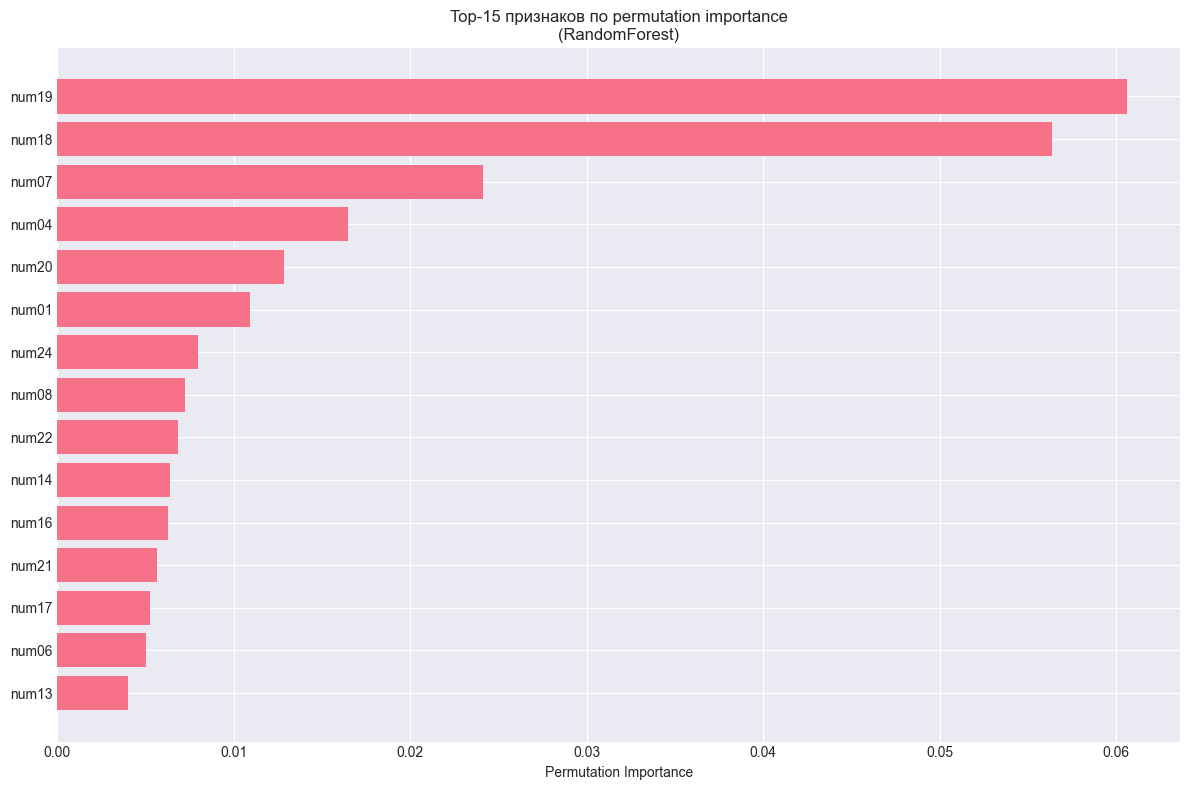

График сохранен в artifacts/figures\permutation_importance.png

3. Сохранение лучшей модели
Модель сохранена в artifacts/best_model.joblib

4. Сохранение метаданных
Метаданные сохранены в artifacts/best_model_meta.json
Структура метаданных: metadata, best_model, all_models, feature_importance

Сравнение всех моделей (отсортировано по ROC-AUC):
             Model  Accuracy  Precision   Recall       F1  ROC-AUC
      RandomForest  0.925833   0.928367 0.835052 0.879240 0.966576
          Stacking  0.931667   0.913514 0.871134 0.891821 0.966527
  GradientBoosting  0.920417   0.917261 0.828608 0.870684 0.966269
      DecisionTree  0.865000   0.814763 0.753866 0.783133 0.891411
LogisticRegression  0.827500   0.782813 0.645619 0.707627 0.874691
             Dummy  0.676667   0.000000 0.000000 0.000000      NaN


In [21]:
# 1. Выбор лучшей модели по ROC-AUC
print("1. Выбор лучшей модели по ROC-AUC")
print()

# ВАЖНО: Убедимся, что results_df содержит все 5 моделей
# Добавим недостающие модели в results_df если их нет

# Проверяем, какие модели уже есть в results_df
existing_models = results_df['Model'].unique().tolist()
print(f"Существующие модели в results_df: {existing_models}")

# Добавляем недостающие модели если их нет
required_models = ['Dummy', 'LogisticRegression', 'DecisionTree', 'RandomForest', 'GradientBoosting']

for model_name in required_models:
    if model_name not in existing_models:
        print(f"ВНИМАНИЕ: Модель {model_name} отсутствует в results_df")
        
# Если DummyClassifier еще не обучен и не добавлен в results_df, добавим его
if 'Dummy' not in existing_models:
    print("\nДобавляем DummyClassifier...")
    from sklearn.dummy import DummyClassifier
    
    # Обучаем DummyClassifier
    dummy_clf = DummyClassifier(strategy='stratified', random_state=42)
    dummy_clf.fit(X_train, y_train)
    
    # Оцениваем
    dummy_metrics = quick_evaluate(dummy_clf, X_test, y_test, "Dummy")
    results_df = pd.concat([results_df, pd.DataFrame([dummy_metrics])], ignore_index=True)
    print(f"DummyClassifier добавлен. Accuracy: {dummy_metrics['Accuracy']:.4f}")

# Если LogisticRegression еще не добавлена, добавим
if 'LogisticRegression' not in existing_models and 'lr_pipeline' in locals():
    print("\nДобавляем LogisticRegression...")
    lr_metrics = quick_evaluate(lr_pipeline, X_test, y_test, "LogisticRegression")
    results_df = pd.concat([results_df, pd.DataFrame([lr_metrics])], ignore_index=True)
    print(f"LogisticRegression добавлена. ROC-AUC: {lr_metrics['ROC-AUC']:.4f}")

# Сохраняем метрики ВСЕХ моделей в CSV файл
print("\nСохраняем все метрики в CSV файл...")
# Создаем структурированный DataFrame для сохранения
metrics_for_csv = pd.DataFrame()

# Добавляем раздел с общей информацией
summary_row = pd.DataFrame([{
    'Model': 'SUMMARY',
    'Total_Models': len(results_df),
    'Best_Model': '',
    'Best_ROC_AUC': 0
}])

# Добавляем результаты всех моделей
results_for_csv = results_df.copy()

# Для удобства сортируем по ROC-AUC
results_for_csv = results_for_csv.sort_values('ROC-AUC', ascending=False)

# Сохраняем в CSV
metrics_path = "artifacts/metrics_test.csv"
results_for_csv.to_csv(metrics_path, index=False, encoding='utf-8')
print(f"Метрики сохранены в {metrics_path}")
print(f"Всего моделей в файле: {len(results_df)}")
print(f"Список моделей: {results_df['Model'].tolist()}")

# Теперь выбираем лучшую модель
print("\n" + "="*50)
print("Выбор лучшей модели:")

# Отфильтровываем модели без ROC-AUC (кроме Dummy, если у него нет ROC-AUC)
models_with_auc = results_df[results_df['ROC-AUC'].notna()]

if len(models_with_auc) > 0:
    # Находим модель с максимальным ROC-AUC
    best_idx = models_with_auc['ROC-AUC'].idxmax()
    best_model_name = models_with_auc.loc[best_idx, 'Model']
    best_model_auc = models_with_auc.loc[best_idx, 'ROC-AUC']
    
    print(f"Лучшая модель по ROC-AUC: {best_model_name}")
    print(f"ROC-AUC: {best_model_auc:.4f}")
    
    # Словарь соответствия имен моделей и объектов
    # ВАЖНО: Используем точно такие же имена как в results_df
    model_objects = {
        'LogisticRegression': lr_pipeline if 'lr_pipeline' in locals() else None,
        'DecisionTree': dt_best if 'dt_best' in locals() else None,
        'RandomForest': rf_best if 'rf_best' in locals() else None,
        'GradientBoosting': gb_best if 'gb_best' in locals() else None,
        'Dummy': dummy_clf if 'dummy_clf' in locals() else None,
        'Stacking': stacking_clf if 'stacking_clf' in locals() else None
    }
    
    # Получаем объект лучшей модели
    if best_model_name in model_objects and model_objects[best_model_name] is not None:
        best_model = model_objects[best_model_name]
        
        # 2. Расчет permutation importance (если это не Dummy)
        if best_model_name != 'Dummy':
            print("\n2. Расчет permutation importance")
            print("="*50)
            
            # Для скорости используем меньшее количество перестановок
            perm_importance = permutation_importance(
                best_model, X_test, y_test,
                n_repeats=10,  # Увеличили для большей стабильности
                random_state=42,
                n_jobs=-1,
                scoring='roc_auc'
            )
            
            # Создаем DataFrame с важностью признаков
            perm_df = pd.DataFrame({
                'feature': X.columns,
                'importance_mean': perm_importance.importances_mean,
                'importance_std': perm_importance.importances_std
            }).sort_values('importance_mean', ascending=False)
            
            # Выводим топ-10 признаков
            print("Top-10 признаков по permutation importance:")
            print(perm_df.head(10).round(4))
            
            # Визуализация топ-15 признаков
            plt.figure(figsize=(12, 8))
            top_features = perm_df.head(15)
            plt.barh(range(len(top_features)), top_features['importance_mean'])
            plt.yticks(range(len(top_features)), top_features['feature'])
            plt.xlabel('Permutation Importance')
            plt.title(f'Top-15 признаков по permutation importance\n({best_model_name})')
            plt.gca().invert_yaxis()
            plt.tight_layout()
            
            # Сохраняем график
            perm_path = os.path.join(figures_dir, "permutation_importance.png")
            plt.savefig(perm_path, dpi=150, bbox_inches='tight')
            plt.show()
            print(f"График сохранен в {perm_path}")
        else:
            print("\nПропускаем permutation importance для DummyClassifier")
            perm_df = pd.DataFrame({'feature': [], 'importance_mean': [], 'importance_std': []})
        
        # 3. Сохранение лучшей модели
        print("\n3. Сохранение лучшей модели")
        print("="*50)
        
        # Создаем директорию если нет
        os.makedirs("artifacts", exist_ok=True)
        
        # Сохраняем модель
        model_path = "artifacts/best_model.joblib"
        joblib.dump(best_model, model_path)
        print(f"Модель сохранена в {model_path}")
        
        # 4. Сохранение метаданных В ФОРМАТЕ JSON с правильной структурой
        print("\n4. Сохранение метаданных")
        print("="*50)
        
        # Получаем все метрики для лучшей модели из results_df
        # ВАЖНО: Используем точное совпадение имени
        best_model_metrics = results_df[results_df['Model'] == best_model_name].iloc[0].to_dict()
        
        # Создаем структурированные метаданные с разделами
        metadata = {
            'metadata': {
                'generated_date': datetime.now().isoformat(),
                'total_models_evaluated': len(results_df),
                'selection_criterion': 'ROC-AUC',
                'best_model_name': best_model_name
            },
            'best_model': {
                'name': best_model_name,
                'performance': {
                    'test_set': {
                        'accuracy': float(best_model_metrics['Accuracy']),
                        'precision': float(best_model_metrics['Precision']),
                        'recall': float(best_model_metrics['Recall']),
                        'f1': float(best_model_metrics['F1']),
                        'roc_auc': float(best_model_metrics['ROC-AUC'])
                    }
                }
            },
            'all_models': results_df.to_dict('records'),  # Все модели для сравнения
            'feature_importance': {
                'method': 'permutation_importance',
                'top_features': perm_df.head(10)[['feature', 'importance_mean']].to_dict('records') if len(perm_df) > 0 else []
            }
        }
        
        # Добавляем параметры модели если они есть
        if hasattr(best_model, 'get_params'):
            metadata['best_model']['parameters'] = best_model.get_params()
        
        # Сохраняем метаданные в JSON
        meta_path = "artifacts/best_model_meta.json"
        with open(meta_path, 'w', encoding='utf-8') as f:
            json.dump(metadata, f, indent=2, ensure_ascii=False, default=str)
        
        print(f"Метаданные сохранены в {meta_path}")
        print(f"Структура метаданных: metadata, best_model, all_models, feature_importance")
        
    else:
        print(f"ОШИБКА: Не найден объект модели для {best_model_name}")
else:
    print("ОШИБКА: Нет моделей с рассчитанным ROC-AUC")

# Дополнительно: Выводим таблицу сравнения всех моделей
print("\n" + "="*50)
print("Сравнение всех моделей (отсортировано по ROC-AUC):")
print(results_df.sort_values('ROC-AUC', ascending=False).to_string(index=False))

## Сравнение с ожиданиями
1. Признаки с высокой важностью обычно указывают на сильные предикторы целевой переменной
2. Признаки с низкой/нулевой важностью могут быть избыточными или слабо связаны с целевой переменной
3. Permutation importance показывает влияние на качество модели, а не на корреляцию с целевой переменной
Выведенные признаки схожи с ожиданиями

In [22]:
# Функция для обучения и оценки модели с заданным random_state
def evaluate_with_random_state(rs):
    X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(
        X, y, test_size=0.2, random_state=rs, stratify=y
    )
    
    # RandomForest
    rf = RandomForestClassifier(random_state=rs, n_jobs=-1)
    rf.fit(X_train_temp, y_train_temp)
    rf_pred = rf.predict(X_test_temp)
    rf_proba = rf.predict_proba(X_test_temp)[:, 1]
    
    # LogisticRegression
    lr_pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(random_state=rs, max_iter=1000))
    ])
    lr_pipe.fit(X_train_temp, y_train_temp)
    lr_pred = lr_pipe.predict(X_test_temp)
    lr_proba = lr_pipe.predict_proba(X_test_temp)[:, 1]
    
    return {
        'RandomForest': {
            'f1': f1_score(y_test_temp, rf_pred),
            'roc_auc': roc_auc_score(y_test_temp, rf_proba)
        },
        'LogisticRegression': {
            'f1': f1_score(y_test_temp, lr_pred),
            'roc_auc': roc_auc_score(y_test_temp, lr_proba)
        }
    }

# Проводим 5 прогонов с разными random_state
random_states = [42, 43, 44, 45, 46]
results = []

for rs in random_states:
    results.append(evaluate_with_random_state(rs))

# Выводим результаты
print("\nРезультаты 5 прогонов с разными random_state:")
print("="*60)

for i, rs in enumerate(random_states):
    print(f"\nrandom_state = {rs}:")
    print(f"  RandomForest: F1 = {results[i]['RandomForest']['f1']:.4f}, "
          f"ROC-AUC = {results[i]['RandomForest']['roc_auc']:.4f}")
    print(f"  LogisticRegression: F1 = {results[i]['LogisticRegression']['f1']:.4f}, "
          f"ROC-AUC = {results[i]['LogisticRegression']['roc_auc']:.4f}")

# Статистика
rf_f1_scores = [r['RandomForest']['f1'] for r in results]
rf_auc_scores = [r['RandomForest']['roc_auc'] for r in results]
lr_f1_scores = [r['LogisticRegression']['f1'] for r in results]
lr_auc_scores = [r['LogisticRegression']['roc_auc'] for r in results]

print("\n" + "="*60)
print("СТАТИСТИКА ПО 5 ПРОГОНАМ:")
print("="*60)
print("\nRandomForest:")
print(f"  F1-score: среднее = {np.mean(rf_f1_scores):.4f}, "
      f"ст. отклонение = {np.std(rf_f1_scores):.4f}")
print(f"  ROC-AUC: среднее = {np.mean(rf_auc_scores):.4f}, "
      f"ст. отклонение = {np.std(rf_auc_scores):.4f}")

print("\nLogisticRegression:")
print(f"  F1-score: среднее = {np.mean(lr_f1_scores):.4f}, "
      f"ст. отклонение = {np.std(lr_f1_scores):.4f}")
print(f"  ROC-AUC: среднее = {np.mean(lr_auc_scores):.4f}, "
      f"ст. отклонение = {np.std(lr_auc_scores):.4f}")


Результаты 5 прогонов с разными random_state:

random_state = 42:
  RandomForest: F1 = 0.8792, ROC-AUC = 0.9666
  LogisticRegression: F1 = 0.7076, ROC-AUC = 0.8747

random_state = 43:
  RandomForest: F1 = 0.8954, ROC-AUC = 0.9679
  LogisticRegression: F1 = 0.7140, ROC-AUC = 0.8776

random_state = 44:
  RandomForest: F1 = 0.8800, ROC-AUC = 0.9643
  LogisticRegression: F1 = 0.7109, ROC-AUC = 0.8789

random_state = 45:
  RandomForest: F1 = 0.8895, ROC-AUC = 0.9693
  LogisticRegression: F1 = 0.7302, ROC-AUC = 0.8873

random_state = 46:
  RandomForest: F1 = 0.8824, ROC-AUC = 0.9692
  LogisticRegression: F1 = 0.6988, ROC-AUC = 0.8753

СТАТИСТИКА ПО 5 ПРОГОНАМ:

RandomForest:
  F1-score: среднее = 0.8853, ст. отклонение = 0.0062
  ROC-AUC: среднее = 0.9674, ст. отклонение = 0.0019

LogisticRegression:
  F1-score: среднее = 0.7123, ст. отклонение = 0.0103
  ROC-AUC: среднее = 0.8788, ст. отклонение = 0.0045


In [23]:
# Получаем предсказания лучшей модели
y_pred_best = rf_best.predict(X_test)

# Создаем confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

print(f"\nConfusion Matrix:")
print(f"[{cm[0,0]:>3} {cm[0,1]:>3}]  # True Negative: {cm[0,0]}, False Positive: {cm[0,1]}")
print(f"[{cm[1,0]:>3} {cm[1,1]:>3}]  # False Negative: {cm[1,0]}, True Positive: {cm[1,1]}")

print("\nИнтерпретация:")
print("-"*40)
print(f"Всего объектов: {len(y_test)}")
print(f"Правильно предсказано: {cm[0,0] + cm[1,1]} ({100*(cm[0,0] + cm[1,1])/len(y_test):.1f}%)")
print(f"Ошибочно предсказано: {cm[0,1] + cm[1,0]} ({100*(cm[0,1] + cm[1,0])/len(y_test):.1f}%)")
print(f"\nОшибки I рода (False Positive): {cm[0,1]} ({100*cm[0,1]/cm[0].sum():.1f}% от класса 0)")
print(f"Ошибки II рода (False Negative): {cm[1,0]} ({100*cm[1,0]/cm[1].sum():.1f}% от класса 1)")


Confusion Matrix:
[1574  50]  # True Negative: 1574, False Positive: 50
[128 648]  # False Negative: 128, True Positive: 648

Интерпретация:
----------------------------------------
Всего объектов: 2400
Правильно предсказано: 2222 (92.6%)
Ошибочно предсказано: 178 (7.4%)

Ошибки I рода (False Positive): 50 (3.1% от класса 0)
Ошибки II рода (False Negative): 128 (16.5% от класса 1)


In [24]:
# Расчет permutation importance (если еще не рассчитывалось)
if 'perm_df' not in locals():
    from sklearn.inspection import permutation_importance
    perm_importance = permutation_importance(
        rf_best, X_test, y_test,
        n_repeats=5,
        random_state=42,
        n_jobs=-1,
        scoring='roc_auc'
    )
    
    perm_df = pd.DataFrame({
        'feature': X.columns,
        'importance_mean': perm_importance.importances_mean,
        'importance_std': perm_importance.importances_std
    }).sort_values('importance_mean', ascending=False)

print("\nТоп-15 признаков по permutation importance:")
print("-"*60)
print(f"{'№':<3} {'Признак':<20} {'Важность (средняя)':<20} {'Станд. отклонение':<20}")
print("-"*60)

for i, (idx, row) in enumerate(perm_df.head(15).iterrows(), 1):
    print(f"{i:<3} {row['feature']:<20} {row['importance_mean']:<20.6f} {row['importance_std']:<20.6f}")


Топ-15 признаков по permutation importance:
------------------------------------------------------------
№   Признак              Важность (средняя)   Станд. отклонение   
------------------------------------------------------------
1   num19                0.060595             0.001799            
2   num18                0.056359             0.003790            
3   num07                0.024122             0.000991            
4   num04                0.016491             0.001149            
5   num20                0.012848             0.001963            
6   num01                0.010942             0.001041            
7   num24                0.007945             0.000790            
8   num08                0.007227             0.000802            
9   num22                0.006861             0.001302            
10  num14                0.006371             0.000595            
11  num16                0.006252             0.000753            
12  num21                0.00